In [2]:
!pip install cifar10-web

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
from __future__ import print_function
from scipy.io import savemat
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pylab as plt
from scipy.fftpack import dct, idct
import cv2
import os
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [20]:
def normalize(X_train,X_test):
    mean = np.mean(X_train,axis=(0,1,2,3))
    std = np.std(X_train, axis=(0, 1, 2, 3))
    X_train = (X_train-mean)/(std+1e-7)
    X_test = (X_test-mean)/(std+1e-7)
    return X_train, X_test
num_classes = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = normalize(x_train, x_test)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [21]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

In [22]:
model = Sequential()
weight_decay = 0.0005
x_shape = [32,32,3]

model.add(Conv2D(64, (3, 3), padding='same',input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 64)       

# Only use when model is need to be trained

In [ ]:
datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images
        # (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)


def lr_scheduler(epoch):
            return learning_rate * (0.5 ** (epoch // lr_drop))

reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)
batch_size = 128
maxepoches = 70
learning_rate = 0.1
lr_decay = 1e-6
lr_drop = 20


sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])


historytemp = model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=maxepoches,
                    validation_data=(x_test, y_test),verbose=2,callbacks=[reduce_lr])
model.save_weights('new.h5')


In [8]:
model.load_weights('/content/drive/My Drive/All purpose Folder/Pre-trained Model CIFAR-10 VGG16/new.h5')

In [24]:
y_pred = model.predict(x_test)
y_pred_org = []
y_test_org = []
for i in range(len(y_test)):
    y_pred_org.append(np.argmax(y_pred[i]))
    y_test_org.append(np.argmax(y_test[i]))
class_names = ['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']    

In [25]:
count_f = 0
for i in range(len(class_names)):
    count = 0
    count_org = 0
    for k in range(len(y_test_org)):
        if y_test_org[k] == i:
            count_org += 1
            if y_pred_org[k] == i:
                count += 1
                count_f += 1
            else:
                pass
                        
    print("Accuracy for {} class: \t ".format(class_names[i]),"|| {}% ".format(count*100/count_org))

print("=============================================")
print("Test Accuracy:\t \t\t  |{}% ".format(count_f*100/len(y_test)))
        

Accuracy for airplane class: 	  || 0.0% 
Accuracy for automobile class: 	  || 0.0% 
Accuracy for bird class: 	  || 4.0% 
Accuracy for cat class: 	  || 0.0% 
Accuracy for deer class: 	  || 0.0% 
Accuracy for dog class: 	  || 95.9% 
Accuracy for frog class: 	  || 0.0% 
Accuracy for horse class: 	  || 0.0% 
Accuracy for ship class: 	  || 0.0% 
Accuracy for truck class: 	  || 0.0% 
Test Accuracy:	 		  |9.99% 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

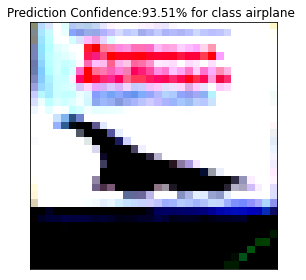

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


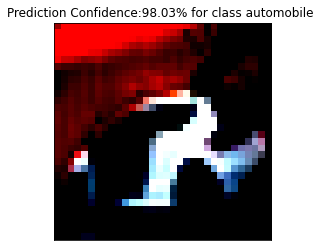

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


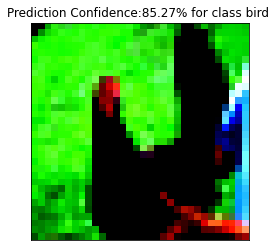

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


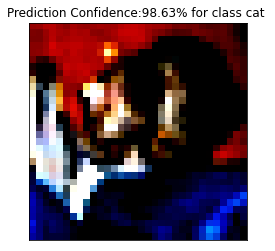

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


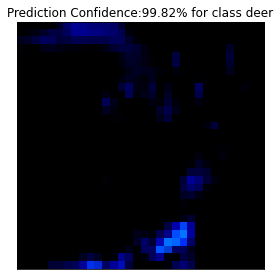

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


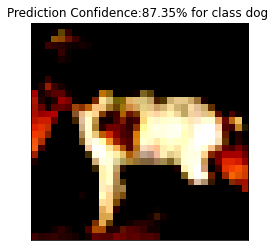

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


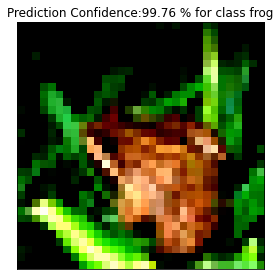

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


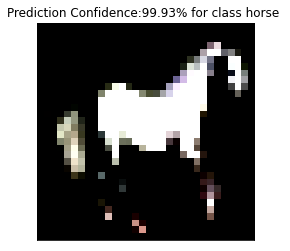

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


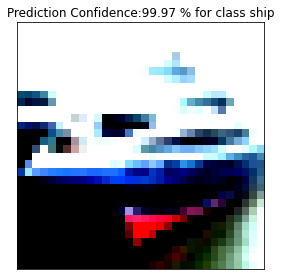

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


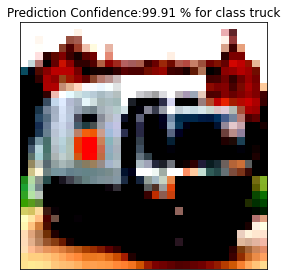

In [13]:
import matplotlib.pyplot as plt

true_image_labels = []

plt.figure(1)
plt.figure(figsize = (10,10))
plt.subplot(221)

for i in range(len(y_test_org)):
    if y_test_org[i] == 0 == y_pred_org[i]:
        plt.title("Prediction Confidence:{}% for class {} ".format(np.round(np.max(model.predict(np.expand_dims(x_test[i],axis=0)))*100,2),class_names[0]))
        plt.imshow(x_test[i][:,:,:]) 
        plt.xticks([])
        plt.yticks([])
        true_image_labels.append(x_test[i])
        true_image_labels.append(y_test_org[i])
        true_image_labels.append(i)
        plt.savefig('{}.jpg'.format(class_names[0]))
#         plt.gray()
        plt.show()
        break


for i in range(len(y_test_org)):
    if y_test_org[i] == 1 == y_pred_org[i]:
        plt.title("Prediction Confidence:{}% for class {} ".format(np.round(np.max(model.predict(np.expand_dims(x_test[i],axis=0)))*100,2),class_names[1]))
        plt.imshow(x_test[i][:,:,:]) 
        plt.xticks([])
        plt.yticks([])
        true_image_labels.append(x_test[i])
        true_image_labels.append(y_test_org[i])
        true_image_labels.append(i)
        plt.savefig('{}.jpg'.format(class_names[1]))
#         plt.gray()
        plt.show()
        break

for i in range(len(y_test_org)):
    if y_test_org[i] == 2 == y_pred_org[i]:
        plt.title("Prediction Confidence:{}% for class {} ".format(np.round(np.max(model.predict(np.expand_dims(x_test[i],axis=0)))*100,2),class_names[2]))
        plt.imshow(x_test[i][:,:,:]) 
        plt.xticks([])
        plt.yticks([])
        true_image_labels.append(x_test[i])
        true_image_labels.append(y_test_org[i])
        true_image_labels.append(i)
        plt.savefig('{}.jpg'.format(class_names[2]))
#         plt.gray()
        plt.show()
        break

for i in range(len(y_test_org)):
    if y_test_org[i] == 3 == y_pred_org[i]:
        plt.title("Prediction Confidence:{}% for class {} ".format(np.round(np.max(model.predict(np.expand_dims(x_test[i],axis=0)))*100,2),class_names[3]))
        plt.imshow(x_test[i][:,:,:]) 
        plt.xticks([])
        plt.yticks([])
        true_image_labels.append(x_test[i])
        true_image_labels.append(y_test_org[i])
        true_image_labels.append(i)
        plt.savefig('{}.jpg'.format(class_names[3]))
        plt.show()
        break

plt.figure(figsize = (10,10))        
plt.subplot(222)
for i in range(len(y_test_org)):
    if y_test_org[i] == 4 == y_pred_org[i]:
        plt.title("Prediction Confidence:{}% for class {}".format(np.round(np.max(model.predict(np.expand_dims(x_test[i],axis=0)))*100,2),class_names[4]))
        plt.imshow(x_test[i][:,:,:]) 
        plt.xticks([])
        plt.yticks([])
        true_image_labels.append(x_test[i])
        true_image_labels.append(y_test_org[i])
        true_image_labels.append(i)
        plt.savefig('{}.jpg'.format(class_names[4]))
        plt.show()
        break

for i in range(len(y_test_org)):
    if y_test_org[i] == 5 == y_pred_org[i]:
        plt.title("Prediction Confidence:{}% for class {} ".format(np.round(np.max(model.predict(np.expand_dims(x_test[i],axis=0)))*100,2),class_names[5]))
        plt.imshow(x_test[i][:,:,:]) 
        plt.xticks([])
        plt.yticks([])
        true_image_labels.append(x_test[i])
        true_image_labels.append(y_test_org[i])
        true_image_labels.append(i)
        plt.savefig('{}.jpg'.format(class_names[5]))
        plt.show()
        break

plt.figure(figsize = (10,10))
plt.subplot(223)
for i in range(len(y_test_org)):
    if y_test_org[i] == 6 == y_pred_org[i]:
        plt.title("Prediction Confidence:{} % for class {}".format(np.round(np.max(model.predict(np.expand_dims(x_test[i],axis=0)))*100,2),class_names[6]))
        plt.imshow(x_test[i][:,:,:]) 
        plt.xticks([])
        plt.yticks([])
        true_image_labels.append(x_test[i])
        true_image_labels.append(y_test_org[i])
        true_image_labels.append(i)
        plt.savefig('{}.jpg'.format(class_names[6]))
        plt.show()
        break

for i in range(len(y_test_org)):
    if y_test_org[i] == 7 == y_pred_org[i]:
        plt.title("Prediction Confidence:{}% for class {} ".format(np.round(np.max(model.predict(np.expand_dims(x_test[i],axis=0)))*100,2),class_names[7]))
        plt.imshow(x_test[i][:,:,:]) 
        plt.xticks([])
        plt.yticks([])
        true_image_labels.append(x_test[i])
        true_image_labels.append(y_test_org[i])
        true_image_labels.append(i)
        plt.savefig('{}.jpg'.format(class_names[7]))
        plt.show()
        break


plt.figure(figsize = (10,10))
plt.subplot(224)
for i in range(len(y_test_org)):
    if y_test_org[i] == 8 == y_pred_org[i]:
        plt.title("Prediction Confidence:{} % for class {}".format(np.round(np.max(model.predict(np.expand_dims(x_test[i],axis=0)))*100,2), class_names[8]))
        plt.imshow(x_test[i][:,:,:]) 
        plt.xticks([])
        plt.yticks([])
        true_image_labels.append(x_test[i])
        true_image_labels.append(y_test_org[i])
        true_image_labels.append(i)
        plt.savefig('{}.jpg'.format(class_names[8]))
        plt.show()
        break

plt.figure(figsize = (10,10))
plt.subplot(224)
for i in range(len(y_test_org)):
    if y_test_org[i] == 9 == y_pred_org[i]:
        plt.title("Prediction Confidence:{} % for class {}".format(np.round(np.max(model.predict(np.expand_dims(x_test[i],axis=0)))*100,2), class_names[9]))
        plt.imshow(x_test[i][:,:,:]) 
        plt.xticks([])
        plt.yticks([])
        true_image_labels.append(x_test[i])
        true_image_labels.append(y_test_org[i])
        true_image_labels.append(i)
        plt.savefig('{}.jpg'.format(class_names[9]))
        plt.show()
        break
   


# The non-targeted challenge focuses on tricking the classifier with any other class, while the targeted challenge focuses on tricking the classifier into thinking the image is a specific target class. 

# FGSM

In [14]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = tf.convert_to_tensor(model(input_image))
        loss = loss_object(input_label, prediction)
    gradient = tape.gradient(loss, input_image)
    signed_grad = tf.sign(gradient)
    return (signed_grad,gradient,loss,prediction)

def display_images(image, description,class_names, model,i,true_label,pert_img,t):
    val='0'
    
    _, confidence, label = val,np.round(np.max(tf.convert_to_tensor(model(image))),2),class_names[np.argmax(tf.convert_to_tensor(model(image)))]
#     confidence = 

    plt.figure()
    plt.imshow(image[0]*0.5+0.5)
    pert_img.append(image[0]*0.5+0.5)
    pert_img.append(label)
    pert_img.append(i)
    pert_img.append(t)
    plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, confidence*100))
    plt.xticks([])
    plt.yticks([])
    plt.show()
    return(pert_img)


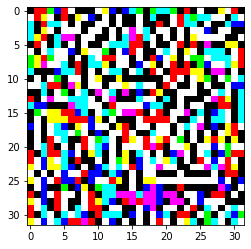

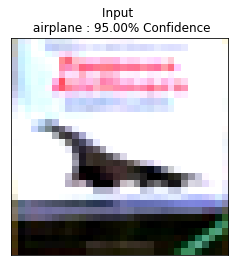

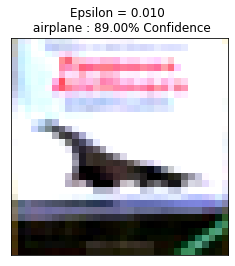

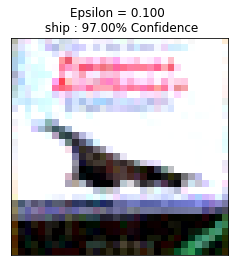

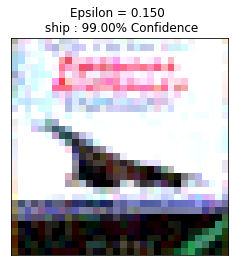

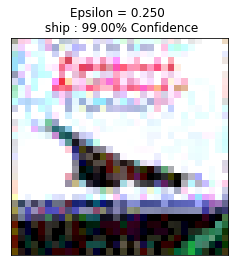

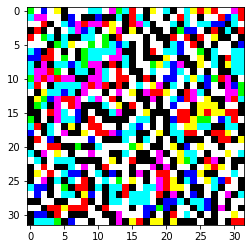

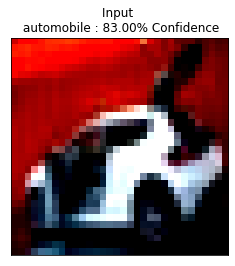

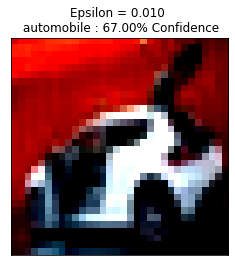

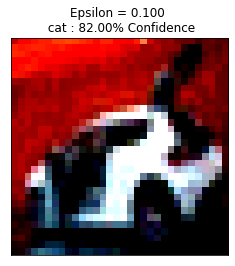

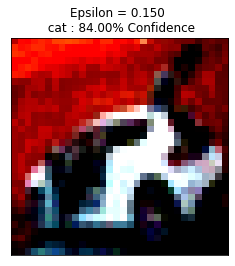

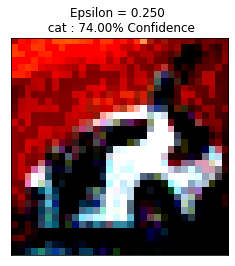

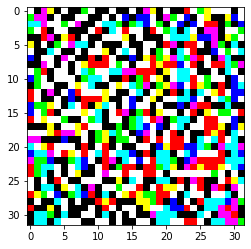

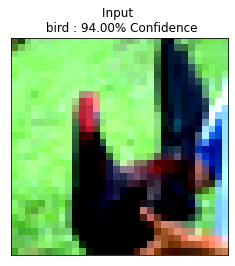

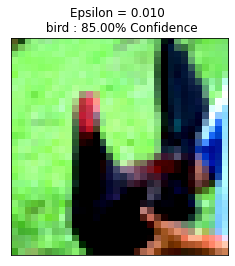

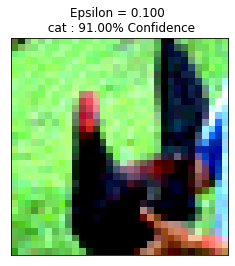

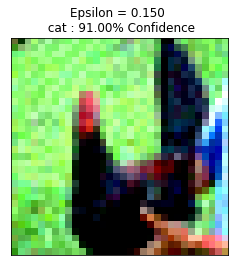

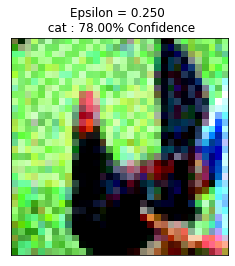

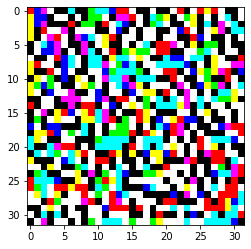

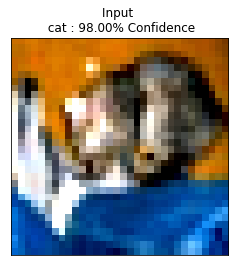

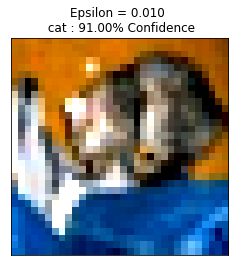

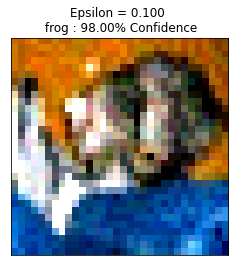

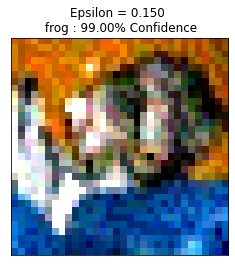

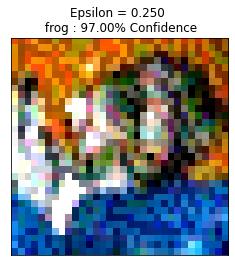

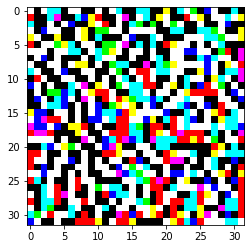

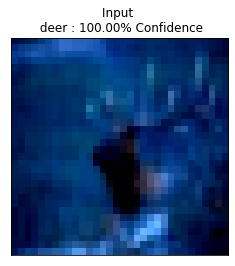

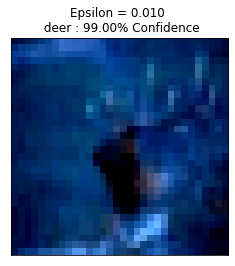

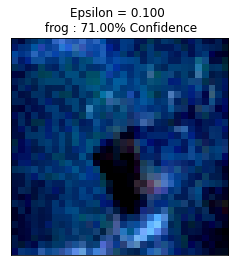

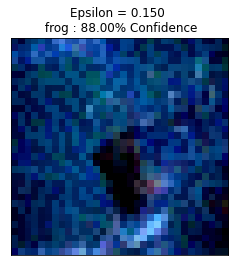

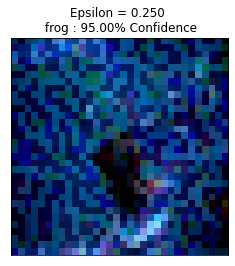

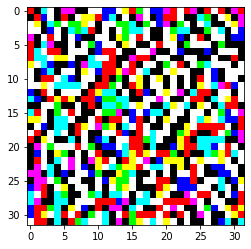

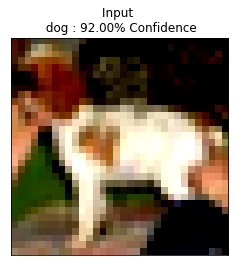

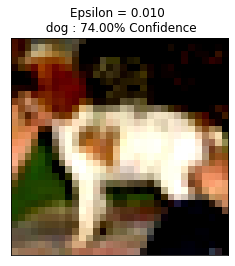

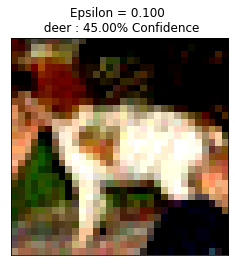

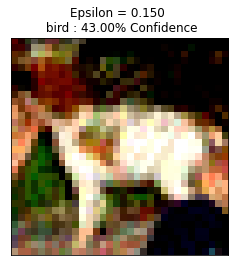

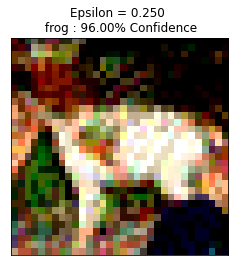

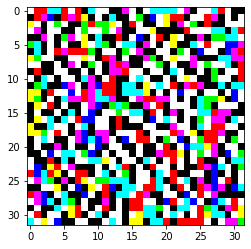

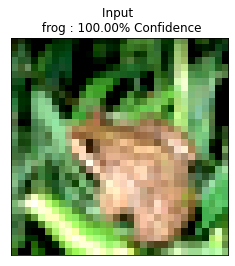

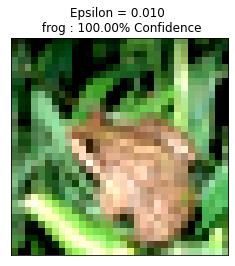

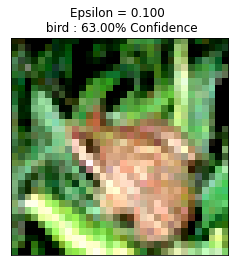

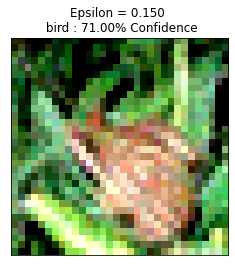

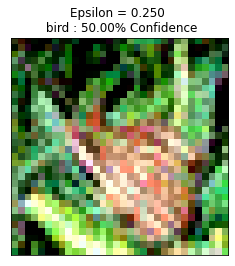

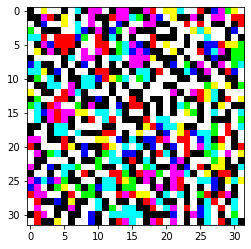

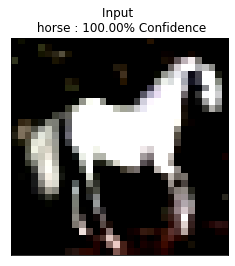

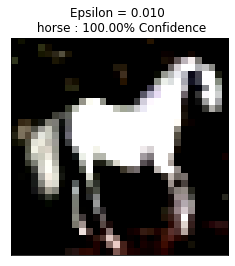

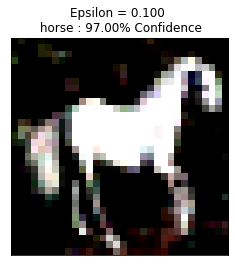

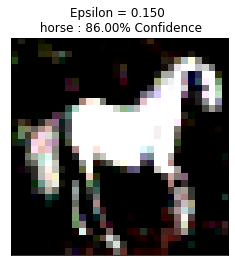

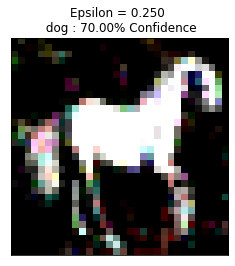

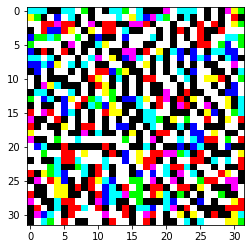

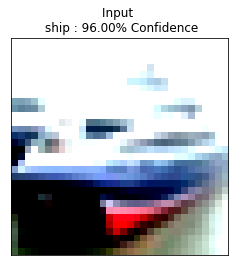

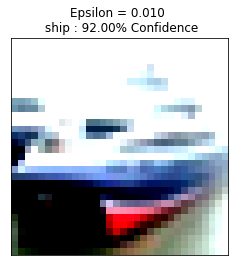

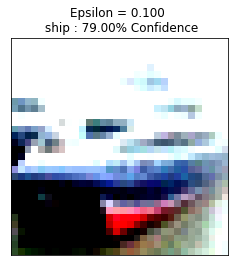

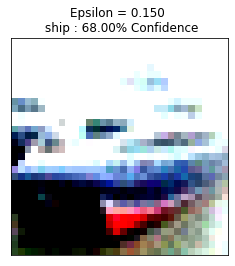

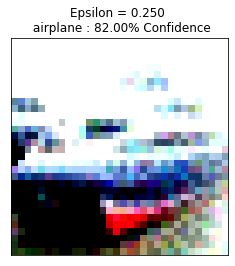

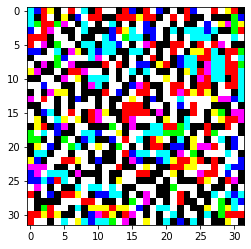

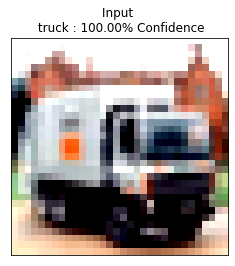

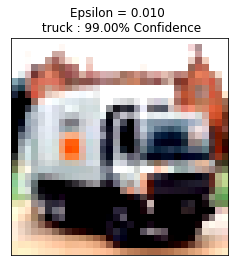

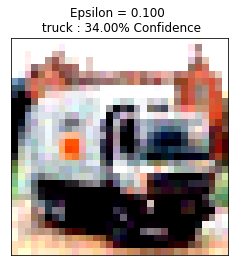

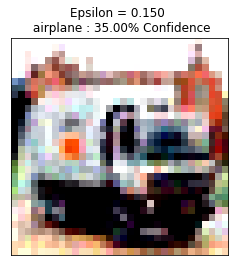

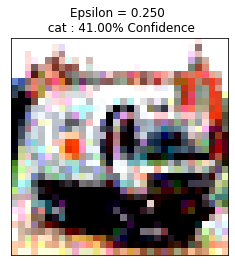

In [15]:
t = np.array(true_image_labels).reshape((-1,3))
pert_img_list = []
for q in range(len(t)):  
  image = tf.convert_to_tensor(np.expand_dims(t[q,0],axis = 0))
  label = tf.convert_to_tensor(np.expand_dims(y_test[t[q,2]],axis = 0))

  perturbations,a,b,c = create_adversarial_pattern(image, label)
  plt.imshow(perturbations[0]*0.5+0.5);
  plt.show()

  epsilons = [0, 0.01, 0.1, 0.15, 0.25]
  descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                  for eps in epsilons]

  for i, eps in enumerate(epsilons):
      adv_x = image + eps*perturbations
      adv_x = tf.clip_by_value(adv_x, -1, 1)
      pert_img_list = display_images(adv_x, descriptions[i],class_names, model,i,t[q,1],pert_img_list,t[q,2])   

pert_img_list = np.array(pert_img_list).reshape((-1,4))   

## SSIM

In [41]:
from skimage.measure import compare_ssim
for i in range(len(pert_img_list)):
  (score, diff) = compare_ssim(np.array(pert_img_list[i,0][:,:,0]), x_test[pert_img_list[i,2]][:,:,0], full=True)
  print('Label {} epsilon {} Score: \t{}'.format(pert_img_list[i,1],epsilons[pert_img_list[i,2]],score))
# print('difference:{}'.format(diff))

Label airplane epsilon 0 Score: 	0.00033042958248702436
Label airplane epsilon 0.01 Score: 	0.031754826721695446
Label ship epsilon 0.1 Score: 	-0.03939280114923455
Label ship epsilon 0.15 Score: 	0.32944624217129304
Label ship epsilon 0.25 Score: 	0.01847933388001014
Label automobile epsilon 0 Score: 	-0.010665751111639058
Label automobile epsilon 0.01 Score: 	-0.0008246656411198991
Label cat epsilon 0.1 Score: 	-0.026005788270883498
Label cat epsilon 0.15 Score: 	-0.048047479851101894
Label cat epsilon 0.25 Score: 	0.0673186634380698
Label bird epsilon 0 Score: 	-0.03694228833244223
Label bird epsilon 0.01 Score: 	0.01394093437061017
Label cat epsilon 0.1 Score: 	-0.02152833279137442
Label cat epsilon 0.15 Score: 	0.0690596671815624
Label cat epsilon 0.25 Score: 	0.022288049769543634
Label cat epsilon 0 Score: 	0.023030089601136894
Label cat epsilon 0.01 Score: 	-0.008629896952849611
Label frog epsilon 0.1 Score: 	-0.025304583752305113
Label frog epsilon 0.15 Score: 	0.01551463774868

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  This is separate from the ipykernel package so we can avoid doing imports until


# Question 3: Mitigation

# JPEG Compression


In [17]:
mdic = {'image_array':pert_img_list[:,0],'labels': pert_img_list[:,1]}
savemat('/content/drive/My Drive/All purpose Folder/Assign2/Q1/Advesarial_Images.mat', mdic)

Original Perturbed Image size (Bytes):airplane_0
8041
Compressed Perturbed 1 Image size (Bytes):airplane_0
6422
Compressed Perturbed 2 Image size (Bytes):airplane_0
5364

Original Perturbed Image size (Bytes):airplane_1
8245
Compressed Perturbed 1 Image size (Bytes):airplane_1
6421
Compressed Perturbed 2 Image size (Bytes):airplane_1
5371

Original Perturbed Image size (Bytes):ship_2
8748
Compressed Perturbed 1 Image size (Bytes):ship_2
6878
Compressed Perturbed 2 Image size (Bytes):ship_2
5659

Original Perturbed Image size (Bytes):ship_3
8945
Compressed Perturbed 1 Image size (Bytes):ship_3
7172
Compressed Perturbed 2 Image size (Bytes):ship_3
5867

Original Perturbed Image size (Bytes):ship_4
9156
Compressed Perturbed 1 Image size (Bytes):ship_4
7871
Compressed Perturbed 2 Image size (Bytes):ship_4
6375

Original Perturbed Image size (Bytes):automobile_0
7910
Compressed Perturbed 1 Image size (Bytes):automobile_0
7000
Compressed Perturbed 2 Image size (Bytes):automobile_0
5754

Orig

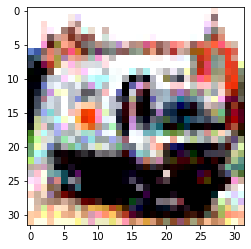

In [327]:
w = pert_img_list
for i in range(w.shape[0]):
  plt.imshow(w[i,0])
  plt.savefig('1_pert_comp_{}_{}.jpg'.format(w[i,1],w[i,2]),  quality=30, optimize=True, progressive=True)  
  plt.savefig('2_pert_comp_{}_{}.jpg'.format(w[i,1],w[i,2]),  quality=20, optimize=True, progressive=True)  
  plt.savefig('org_{}_{}.png'.format(w[i,1],w[i,2]),  quality=80, optimize=True, progressive=True) 
  print('=============================================================')
  print('Original Perturbed Image size (Bytes):{}_{}'.format(w[i,1],w[i,2]))
  print(os.stat('org_{}_{}.png'.format(w[i,1],w[i,2])).st_size)
  print('=============================================================')
  print('Compressed Perturbed 1 Image size (Bytes):{}_{}'.format(w[i,1],w[i,2]))
  print(os.stat('1_pert_comp_{}_{}.jpg'.format(w[i,1],w[i,2])).st_size)
  print('Compressed Perturbed 2 Image size (Bytes):{}_{}'.format(w[i,1],w[i,2]))
  print(os.stat('2_pert_comp_{}_{}.jpg'.format(w[i,1],w[i,2])).st_size)
  print()

### Comment on the difference in classification accuracy observed between:
(i) non-perturbed testing images

(ii) perturbed testing images

(iii) perturbed JPEG compressed testing images.

In [343]:
for i in range(len(pert_img_list)):
  # org_img = plt.imread('a_{}.png'.format(t[i,2]))
  org_img = x_test[pert_img_list[i,-1]]
  print('=================================Original Label: {}================================='.format(class_names[np.argmax(y_test[pert_img_list[i,-1]])]))
  y = model.predict(np.expand_dims(org_img, axis = 0))  
  print('Predicted Label for Original Image:{} with confidence  \t:{}%'.format(class_names[np.argmax(y)],np.round(np.max(y)*100,2)))
  
  pert = plt.imread('org_{}_{}.png'.format(w[i,1],w[i,2]))
  pert = cv2.resize(pert, (32, 32))[:,:,0:3]
  y = model.predict(np.expand_dims(pert, axis = 0))  
  print('Predicted Label for  Perturbed Image:{} with confidence:{}%'.format(class_names[np.argmax(y)],
                                                                                                 np.round(np.max(y)*100,2)))
  
  comp_img_1 = plt.imread('1_pert_comp_{}_{}.jpg'.format(w[i,1],w[i,2]))
  comp_img_1 = cv2.resize(comp_img_1, (32, 32))[:,:,0:3]
  y = model.predict(np.expand_dims(comp_img_1, axis = 0))  
  print('Predicted Label for Compressed Perturbed Image(Compression Rate 1):{} with confidence:{}%'.format(class_names[np.argmax(y)],
                                                                                                 np.round(np.max(y)*100,2))) 
  
  comp_img_2 = plt.imread('2_pert_comp_{}_{}.jpg'.format(w[i,1],w[i,2]))
  comp_img_2 = cv2.resize(comp_img_2, (32, 32))[:,:,0:3]
  y = model.predict(np.expand_dims(comp_img_2, axis = 0))  
  print('Predicted Label for Compressed Perturbed Image(Compression Rate 2):{} with confidence:{}%'.format(class_names[np.argmax(y)],
                                                                                                 np.round(np.max(y)*100,2))) 
  
  print()  

=================================Original Label: airplane=================================
Predicted Label for Original Image:airplane with confidence  	:93.51%
Predicted Label for  Perturbed Image:airplane with confidence:72.37%
Predicted Label for Compressed Perturbed Image(Compression Rate 1):airplane with confidence:93.84%
Predicted Label for Compressed Perturbed Image(Compression Rate 2):airplane with confidence:93.88%

=================================Original Label: airplane=================================
Predicted Label for Original Image:airplane with confidence  	:93.51%
Predicted Label for  Perturbed Image:airplane with confidence:72.75%
Predicted Label for Compressed Perturbed Image(Compression Rate 1):airplane with confidence:92.68%
Predicted Label for Compressed Perturbed Image(Compression Rate 2):airplane with confidence:93.88%

=================================Original Label: airplane=================================
Predicted Label for Original Image:airplane with co

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


======================================== Compression Rate 1 ==============================================
Image Name : a_3
Original Image size (Bytes):
7054
Compressed Image size(Bytes) for Compression Rate 1:
642
Compressed Image size(Bytes) for Compression Rate 2:
643
======================================== Compression Rate 2 ==============================================
======================================== Compression Rate 1 ==============================================
Image Name : a_6
Original Image size (Bytes):
6450
Compressed Image size(Bytes) for Compression Rate 1:
642
Compressed Image size(Bytes) for Compression Rate 2:
644
======================================== Compression Rate 2 ==============================================
======================================== Compression Rate 1 ==============================================
Image Name : a_25
Original Image size (Bytes):
7935
Compressed Image size(Bytes) for Compression Rate 1:
642
Compressed Image size(Byte

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


======================================== Compression Rate 1 ==============================================
Image Name : a_0
Original Image size (Bytes):
7791
Compressed Image size(Bytes) for Compression Rate 1:
642
Compressed Image size(Bytes) for Compression Rate 2:
644
======================================== Compression Rate 2 ==============================================
======================================== Compression Rate 1 ==============================================
Image Name : a_22
Original Image size (Bytes):
5714
Compressed Image size(Bytes) for Compression Rate 1:
642
Compressed Image size(Bytes) for Compression Rate 2:
642
======================================== Compression Rate 2 ==============================================
======================================== Compression Rate 1 ==============================================
Image Name : a_12
Original Image size (Bytes):
6715
Compressed Image size(Bytes) for Compression Rate 1:
642
Compressed Image size(Byt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


======================================== Compression Rate 1 ==============================================
Image Name : a_4
Original Image size (Bytes):
7827
Compressed Image size(Bytes) for Compression Rate 1:
642
Compressed Image size(Bytes) for Compression Rate 2:
643
======================================== Compression Rate 2 ==============================================
======================================== Compression Rate 1 ==============================================
Image Name : a_13
Original Image size (Bytes):
5810
Compressed Image size(Bytes) for Compression Rate 1:
642
Compressed Image size(Bytes) for Compression Rate 2:
643
======================================== Compression Rate 2 ==============================================
======================================== Compression Rate 1 ==============================================
Image Name : a_1
Original Image size (Bytes):
6569
Compressed Image size(Bytes) for Compression Rate 1:
642
Compressed Image size(Byte

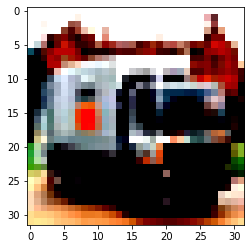

In [274]:
count = 0
for i in range(len(t)):
  cv2.imwrite('compressed_a{}_1.jpg'.format(t[i,2]), t[i,0], [cv2.IMWRITE_JPEG_QUALITY, 0])
  a = t[i,0]
  plt.imshow(a)
  plt.savefig('a_{}.png'.format(t[i,2]))
  print('======================================== Compression Rate 1 ==============================================')
  print('Image Name : a_{}'.format(t[i,2]))
  print('Original Image size (Bytes):')
  print(os.stat('a_{}.png'.format(t[i,2])).st_size)
  print('Compressed Image size(Bytes) for Compression Rate 1:')
  print(os.stat('compressed_a{}_1.jpg'.format(t[i,2])).st_size)
  cv2.imwrite('compressed_a{}_2.jpg'.format(t[i,2]), t[i,0], [cv2.IMWRITE_JPEG_QUALITY, 9])
  print('Compressed Image size(Bytes) for Compression Rate 2:')
  print(os.stat('compressed_a{}_2.jpg'.format(t[i,2])).st_size)
  print('======================================== Compression Rate 2 ==============================================')